## Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
np.random.seed(42)

# Define a dataset with random entries
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

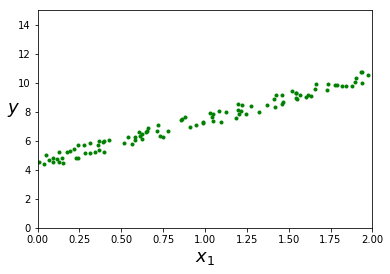

In [2]:
# Plot the dataset
plt.plot(X, y, "g.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [3]:
# Evaluate theta_best
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
# Use the linear algebra module (linalg) to compute the inverse of a matrix
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
print(theta_best)

[[ 4.51359766]
 [ 2.98323418]]


In [5]:
# Make predictions using theta_best
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[  4.51359766]
 [ 10.48006601]]


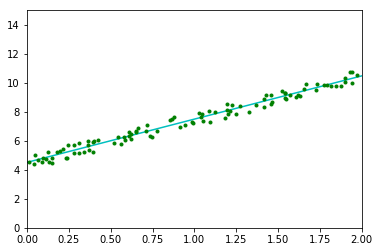

In [6]:
plt.plot(X_new, y_predict, "c-")
plt.plot(X, y, "g.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
# Using scikit-learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.51359766]), array([[ 2.98323418]]))

In [8]:
lin_reg.predict(X_new)

array([[  4.51359766],
       [ 10.48006601]])

## Using Batch Gradient Descent

In [27]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100 # number of elements/examples

# Set theta
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

## Using Stochastic Gradient Descent

In [10]:
# Set epochs
n_epochs = 50
# Set t0 and t1 for learning schedule
t0, t1 = 5, 50
m = len(X_b)



# Eta is not fixed for SGD!
# The steps start out large (which helps make quick progress and escape 
# local minima), then get smaller and smaller, allowing the algorithm to 
# settle at the global minimum
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # Random initialization


for epoch in range(n_epochs):
    for i in range(m):
        # Choose a random value <= m
        random_index = np.random.randint(m)  
        # Select just one feature value from all feature values X_b
        xi = X_b[random_index:random_index+1]
        # Select just one corresponding label value 
        yi = y[random_index:random_index+1]
        # Now evaluate a reduced version of the 
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [11]:
# Implement SGD using scikit-learn
print(theta)

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

[[ 4.52026274]
 [ 2.98502762]]


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [12]:
# Return intercept and slope
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.51388816]), array([ 2.98206789]))

## Using Mini-batch Gradient Descent

In [28]:
n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    # Shuffle feature values indices
    shuffled_indices = np.random.permutation(m)
#     print(shuffled_indices)
    # Shuffle X_b according to shuffled indices
    X_b_shuffled = X_b[shuffled_indices]
    # Shuffle y too
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        # Get X_b shuffled in mini-batches of 20 elements at a time
        xi = X_b_shuffled[i:i+minibatch_size]
#         print(xi)
#         print()
        # Same with y shuffled
        yi = y_shuffled[i:i+minibatch_size]
        # Evaluate gradients
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients # update theta